# ***TITANIC DATASET***

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the data
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Just by looking at the data I can tell that I have some missing data in my *Age*, *Embarked* and *Cabin* column. Lets see how much of the data is actually missing

In [4]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False)/len(df)*100)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


Now I can tell that in column - Cabin, Age and Embarked we have 77.10%, 19.86% and 0.22% of missing data respectively.



***brief description of each column***

    PassengerId -- passenger identifiation unique ID
    Survived -- Survivor flag (0 = dead, 1 = survived)
    Pclass -- ticket class:
        1 = 1st Class
        2 = 2nd Class
        3 = 3rd Class
    Name -- as is
    Sex -- as is
    Age -- as is
    SibSp -- number of siblings/spouses on Titanic
    Parch -- number of parents/children on Titanic
    Ticket -- ticket number
    Fare -- price
    Cabin -- Cabin number
    Embarked -- port of departure
        S = Southampton
        C = Cherbourg
        Q = Queenstown



<function matplotlib.pyplot.show(close=None, block=None)>

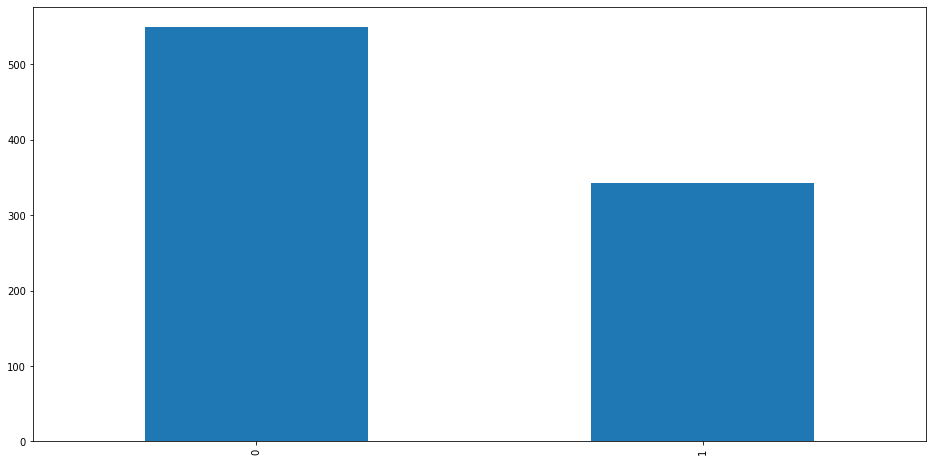

In [5]:
# Number of people survived vs not servived
plt.figure(figsize=(16,8))
df["Survived"].value_counts().plot.bar()
plt.show

In [6]:
non_survived_passenger = round(df["Survived"].value_counts()[0]/len(df)*100,3)
survived_passenger = round(df["Survived"].value_counts()[1]/len(df)*100,3)

In [7]:
print(f"Percentage of passengers survived: {survived_passenger}%")
print(f"Percentage of passengers who could not survived: {non_survived_passenger}%")

Percentage of passengers survived: 38.384%
Percentage of passengers who could not survived: 61.616%


In [8]:
#Maximum and Minimun age of the passengers
print(f"Maximum age is: {df['Age'].max()}")
print(f"Minimum age is: {df['Age'].min()}")

Maximum age is: 80.0
Minimum age is: 0.42


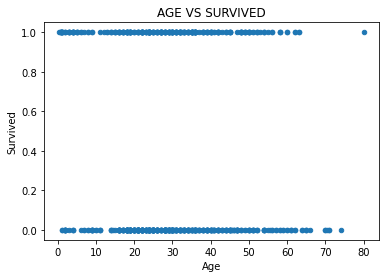

In [9]:
#Univariate Analysis
df.plot(kind="scatter",x="Age",y="Survived")
plt.title("AGE VS SURVIVED")
plt.show()

I did not see any correlations between Age and Survived columns

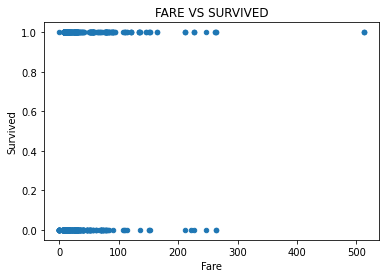

In [10]:
df.plot(kind="scatter", x="Fare", y="Survived")
plt.title("FARE VS SURVIVED")
plt.show()

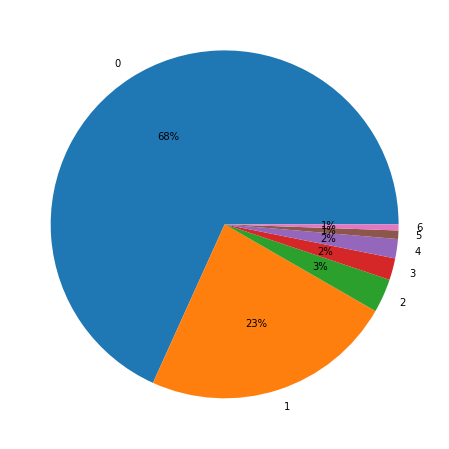

In [11]:
plt.figure(figsize=(16,8))
plt.pie(df["SibSp"].value_counts().values, autopct="%1.0f%%", labels=[0,1,2,3,4,5,6])
plt.show()

<AxesSubplot:>

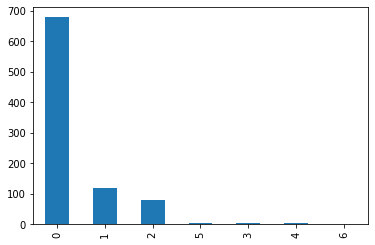

In [12]:
df['Parch'].value_counts().plot.bar()

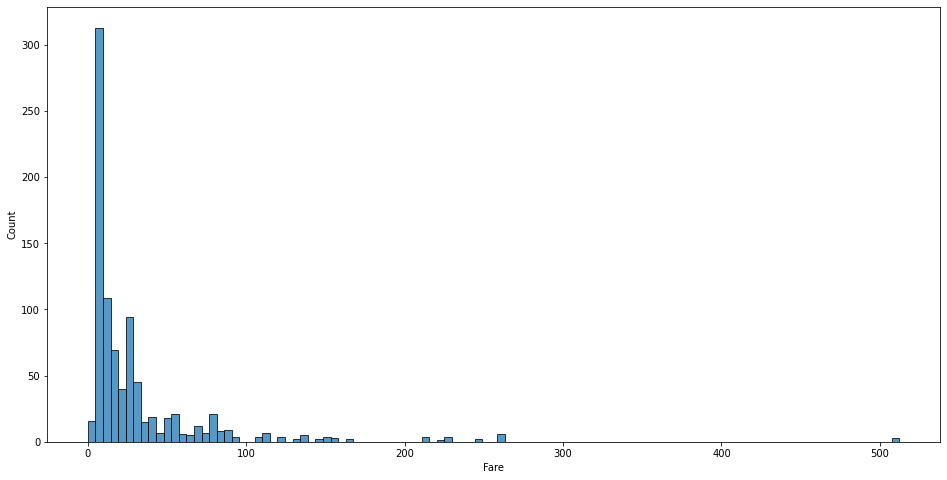

In [13]:
plt.figure(figsize=(16,8))
sns.histplot(df['Fare'])
plt.show()

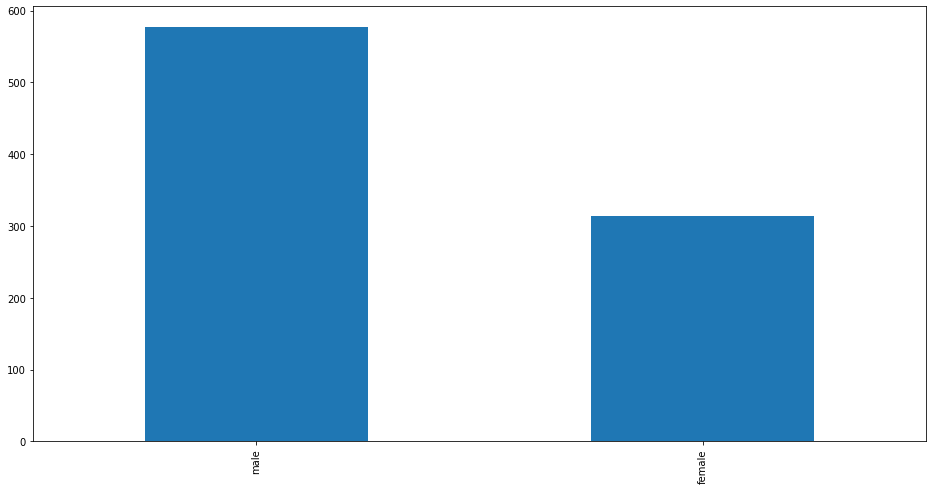

In [14]:
plt.figure(figsize=(16,8))
df["Sex"].value_counts().plot.bar()
plt.show()

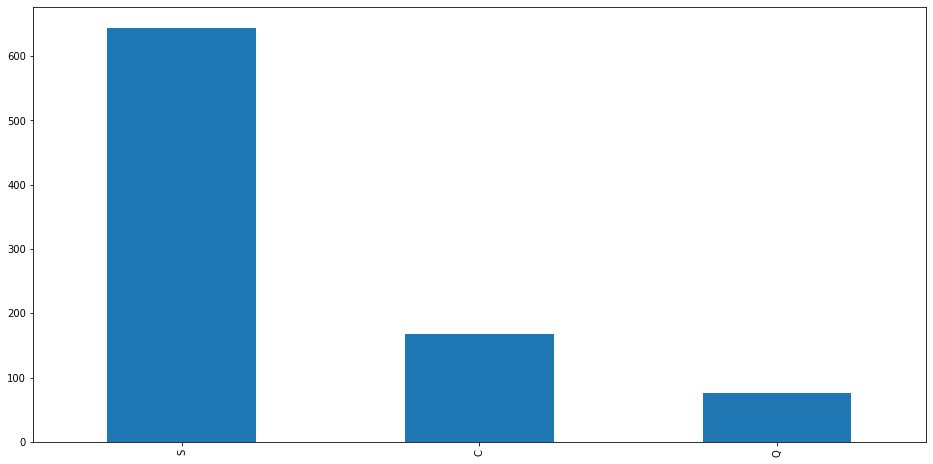

In [15]:
plt.figure(figsize=(16,8))
df["Embarked"].value_counts().plot.bar()
plt.show()

***Preparing the dataset for machine learning***

Seprating numerical and categorical values. Performing preprocessing operations.

In [16]:
# Convert the parent children and sibling spouse columns into a float ones 
# because they don't show a categorial value.
df['Parch'] = df['Parch'].astype(float)
df['SibSp'] = df['SibSp'].astype(float)

In [17]:
features = df.drop("Survived", axis=1)
labels = df["Survived"].values

In [18]:
num_cols = [col for col in features.columns if features[col].dtype in [float]]
print(num_cols)

['Age', 'SibSp', 'Parch', 'Fare']


In [19]:
# Checking for the cardinal value which should be less than 10
cat_cols = [col for col in features.columns if col not in num_cols and df[col].unique().shape[0]<10]
print(cat_cols)

['Pclass', 'Sex', 'Embarked']


In [20]:
df[cat_cols].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [21]:
df[num_cols].head()

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500


Columns with missing values are-
1. Age
1. Cabin
1. Embarked

In [22]:
 # Imputating numerical columns
 # Taking the average value for Age column
df['Age'].mean()

29.69911764705882

In [23]:
features['Age'].mean()

29.69911764705882

In [24]:
features[num_cols]

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500
...,...,...,...,...
886,27.0,0.0,0.0,13.0000
887,19.0,0.0,0.0,30.0000
888,NaN,1.0,2.0,23.4500
889,26.0,0.0,0.0,30.0000


In [25]:
# Option 1
# using fill na
features['Age'].fillna(features['Age'].mean()).values

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [26]:
features['Age'].fillna(features['Age'].mean()).isna().sum()

0

In [27]:
# option 2 (Prefered)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [28]:
imputer = SimpleImputer(strategy="mean")

In [29]:
imputer.fit_transform(features[num_cols])

array([[22.        ,  1.        ,  0.        ,  7.25      ],
       [38.        ,  1.        ,  0.        , 71.2833    ],
       [26.        ,  0.        ,  0.        ,  7.925     ],
       ...,
       [29.69911765,  1.        ,  2.        , 23.45      ],
       [26.        ,  0.        ,  0.        , 30.        ],
       [32.        ,  0.        ,  0.        ,  7.75      ]])

In [30]:
# Making a numerical data pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy='mean')),
    ("scaler",StandardScaler())
])

In [31]:
num_pipeline.fit_transform(features[num_cols])

array([[-0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [ 0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.17706291, -0.4745452 , -0.47367361, -0.49237783]])

So, We have prepared the numerical data. Lets move towards the categorical data

Note- There are no library for imputating categorical data

In [32]:
# Lets again observe the categorical data
features[cat_cols].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [33]:
features[cat_cols].isna().sum()

Pclass      0
Sex         0
Embarked    2
dtype: int64

Only two values are missing from the column "Embarked"

In [34]:
features["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
# From above we can see that the most frequent value here is "S".
# So let's fill that value in our 2 missing "Embarked" rows
features["Embarked"].fillna("S").isna().sum()

0

In [36]:
# Creating a custom imputer
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
        return self
    def transform(self,X,y=None):
        return X.fillna(self.most_frequent)

In [37]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ('cat_imputer',MostFrequentImputer()),
    #('one_hot',OneHotEncoder(sparse=False))
    ('one_hot',OneHotEncoder())
])

In [38]:
cat_pipeline.fit_transform(features[cat_cols])

<891x8 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [39]:
X_num = num_pipeline.fit_transform(features[num_cols])
X_cat = cat_pipeline.fit_transform(features[cat_cols]).toarray()

In [40]:
X_final = np.c_[X_num,X_cat]

In [41]:
print(X_final[:5])

[[-0.5924806   0.43279337 -0.47367361 -0.50244517  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.63878901  0.43279337 -0.47367361  0.78684529  1.          0.
   0.          1.          0.          1.          0.          0.        ]
 [-0.2846632  -0.4745452  -0.47367361 -0.48885426  0.          0.
   1.          1.          0.          0.          0.          1.        ]
 [ 0.40792596  0.43279337 -0.47367361  0.42073024  1.          0.
   0.          1.          0.          0.          0.          1.        ]
 [ 0.40792596 -0.4745452  -0.47367361 -0.48633742  0.          0.
   1.          0.          1.          0.          0.          1.        ]]


In [42]:
X_final.shape

(891, 12)

In [43]:
# SPliting the data in training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, labels, test_size=0.2, random_state=1234)

In [44]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (712, 12)
Testing set shape: (179, 12)


In [45]:
print("Features: ", X_train[:5])
print("Labels: ", y_train[:5])

Features:  [[-1.36202411  0.43279337 -0.47367361 -0.42207354  0.          0.
   1.          0.          1.          1.          0.          0.        ]
 [-2.21467831  0.43279337  2.00893337  2.40299019  1.          0.
   0.          0.          1.          0.          0.          1.        ]
 [ 1.63919557 -0.4745452  -0.47367361 -0.50638754  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.         -0.4745452  -0.47367361  0.48910361  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.71574336 -0.4745452  -0.47367361 -0.38667072  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
Labels:  [1 1 0 1 0]


In [46]:
# Start the training
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
# Decicion Tree Classifier Model
dt = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Checking the score on testing dataset
dt.score(X_test, y_test)

0.8044692737430168

In [50]:
# Checking the score on training dataset
dt.score(X_train, y_train)

0.9845505617977528

Score on traning dataset is slightly higher then testing data set so it is slightly overfiting

In [51]:
# Next Model - Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Checking the score on testing dataset
lr.score(X_test, y_test)

0.8379888268156425

In [53]:
# Checking the score on training dataset
lr.score(X_train, y_train)

0.800561797752809

In [54]:
# Predicting
y_pred=dt.predict(X_test)

In [55]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0])

In [56]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0])

In [57]:
# Checking how many of predictions are wrong
wrong_prediction = 0
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        wrong_prediction += 1
print("Number of wrong prediction: ", wrong_prediction)
print("Number of correct prediction: ",len(y_pred)-wrong_prediction)


Number of wrong prediction:  35
Number of correct prediction:  144


In [58]:
Sample = X_test[0]
print(Sample)

[ 1.10051512 -0.4745452   0.76762988  0.5189714   1.          0.
  0.          1.          0.          1.          0.          0.        ]


In [59]:
dt.predict([Sample])

array([1])

In [60]:
y_test[0]

1

In [61]:
def prediction(sample):
    res = dt.predict([sample])
    return "Survived" if res == 1 else "Not Survived"

In [62]:
prediction(Sample)

'Survived'

In [63]:
prediction(X_test[18])

'Not Survived'

In [64]:
# Next model - SVC classifier Model
from sklearn.svm import SVC
sc = SVC(gamma='auto')

In [65]:
sc.fit(X_train, y_train)

SVC(gamma='auto')

In [66]:
# Checking the score on testing dataset
sc.score(X_test,y_test)

0.8547486033519553

In [67]:
# Checking the score on training dataset
sc.score(X_train,y_train)

0.827247191011236

In [68]:
# Predicting
y_pred_sc = sc.predict(X_test)

In [69]:
# Checking how many of predictions are wrong
wrong_prediction = 0
for i in range(len(y_pred)):
    if y_pred_sc[i] != y_test[i]:
        wrong_prediction += 1
print("Number of wrong prediction: ", wrong_prediction)
print("Number of correct prediction: ",len(y_pred)-wrong_prediction)

Number of wrong prediction:  26
Number of correct prediction:  153


In [70]:
# Next model - Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5, random_state=2021)

In [71]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2021)

In [72]:
# Checking the score on testing dataset
rf.score(X_test,y_test)

0.8435754189944135

In [73]:
# Checking the score on training dataset
rf.score(X_train,y_train)

0.848314606741573

In [74]:
# Predicting
y_pred_rf = rf.predict(X_test)

In [75]:
# Checking how many of predictions are wrong
wrong_prediction = 0
for i in range(len(y_pred)):
    if y_pred_rf[i] != y_test[i]:
        wrong_prediction += 1
print("Number of wrong prediction: ", wrong_prediction)
print("Number of correct prediction: ",len(y_pred)-wrong_prediction)

Number of wrong prediction:  28
Number of correct prediction:  151
